<img src="ku_logo_uk_v.png" alt="drawing" width="130" style="float:right"/>

# <span style="color:#2c061f"> PS7: Solving the consumer problem with income risk</span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>
*Oluf Kelkjær*

### **Today's Plan**  
1. Status
2. Problem Set 7
    - **Optimizing** convex and non-convex functions
    - **Dynamic model**
3. Let's go :)

## Status
You should all have received feedback from you data projects.  
Let me know if you have any questions or want something elaborated
 
Remaining excercise class plan  
* **Problem Set 7: Solving the consumer problem with income risk**  
* Work on your model project  
* Work on your model project  
* Feedback on model project/Q&A?

## Problem Set 7 (optimizing)

Do yourself a favor and have lecture 11 open while solving this problem set :)  

First part deals with evaluating different **optimization** methods under convex and non-convex (noisy) objective functions.  
Specifically you are going to deal with:  
* Nelder-mead (*robust to noise in objective function*)  
* BFGS and Newton-CG (*quick and precise on smooth objective functions*)  

The **takeaway** is that under a *noisy objective function*, which has **local minimas**, you are not guaranteed to converge to the **global minimum**. The initial guess has great importance and a **multistart** optimization could be appropriate. 

## Problem Set 7 (Dynamic problem)
Second part deals with a **dynamic model**.  
In the exam of 2020 and 2021 you should solve a dynamic model.  
From my experience doing the second part of PS7, is a very good investment of time!  


Dynamic 2-period problem:  
\begin{aligned}
v_{1}(m_{1}) & = 
\max_{c_{1}}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\
m_2 &= (1+r)(m_{1}-c_{1})+y_{2} \\
y_{2} &= \begin{cases}
1-\Delta & \text{with prob. }0.5\\
1+\Delta & \text{with prob. }0.5 
\end{cases}\\
v_{2}(m_{2}) &= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(m_{2}-c_{2}+\kappa)^{1-\rho}}{1-\rho} \\
\end{aligned}

The agents derive utility from **consumption** but also leaving a **bequest**.  
Consumption decisions in period 2, $c_2$, relies on cash on hands in period 2, $m_2$, as well as (uncertain) income, $m_2 = (1+r)(m_1-c_1)+y_2)$.  
In period 2, the spending decisions is tied to the amount of cash-on-hand, $m_2$. Cash-on-hand in period 2 relies on the leftover asset from period 1, $m_1-c_1$.  
The consumer should take this into account when making spending decisions in period 1!

You will therefore solve the models *backwards*, that is solve $v_{2}(m_{2})$ for all $m_2$ and then you can solve $v_{1}(m_{1})$ and ultimately the whole model.

In order to solve the model you will use **interpolation**.    

Think of interpolation as approximating the function from a finite set of points, .e.g:


<img src="linear_interpolation.png" alt="drawing" width="1000"/>

## Lets go! :)

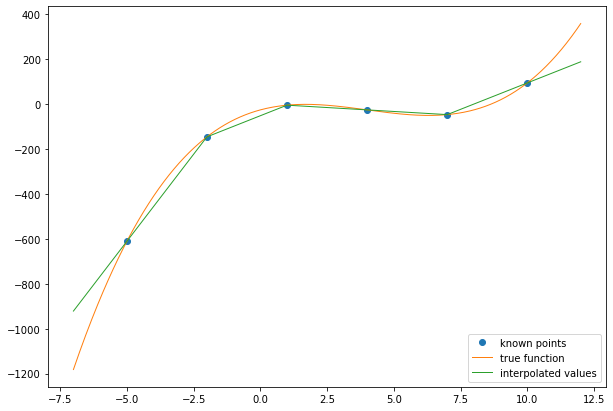

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# function to interpolate
f = lambda x: (x-3)**3 - 3*x**2 + 5*x
G = np.linspace(-5,10,6) # vector with just 6 points
F = f(G) # evaluate function in those 6 points


# a. construct interpolation function
interp_func = interpolate.RegularGridInterpolator([G],F,
                                                  bounds_error=False,
                                                  fill_value=None)
# b. interpolate based on grid
grid = np.linspace(-7,12,500)
interp_values = interp_func(grid)

# c. evaluate true values
true_values = f(grid)

# d. plot true and interpolated values
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)
ax.plot(G,F,'o',label='known points')
ax.plot(grid,true_values,'-',lw=1,label='true function')
ax.plot(grid,interp_values,'-',lw=1,label='interpolated values')
ax.legend(loc='lower right',facecolor='white',frameon=True);
plt.savefig('linear_interpolation.png')

In [ ]:
Jacobian (gradient = first derivative)  
Hessian (second derivative)